<a href="https://colab.research.google.com/github/Hubertmeteor/medical-insurance-cost-prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medical Insurance Cost Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [ ]:
insurance_df=pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Check number of rows and columns
insurance_df.shape

(1338, 7)

In [ ]:
insurance_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df.info()
#no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check for null values in the dataset, No null values in this dataframe
insurance_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

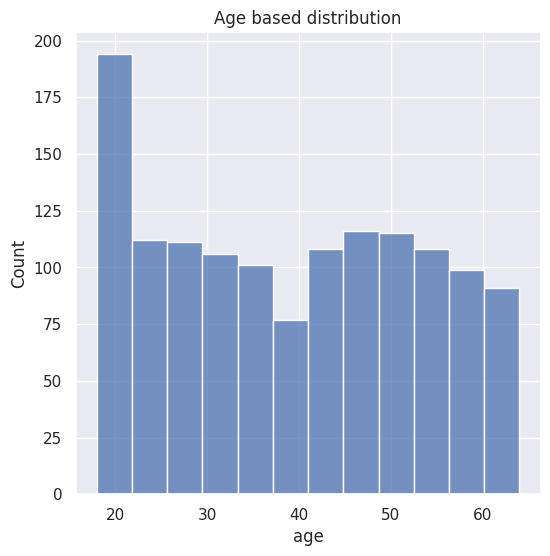

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['age'])
plt.title("Age based distribution")
plt.show()

<ipython-input-9-0bd573789f6e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


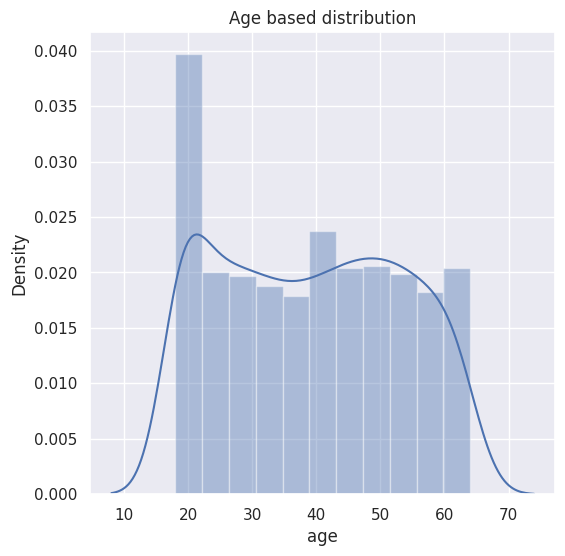

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title("Age based distribution")
plt.show()

Gender Analysis

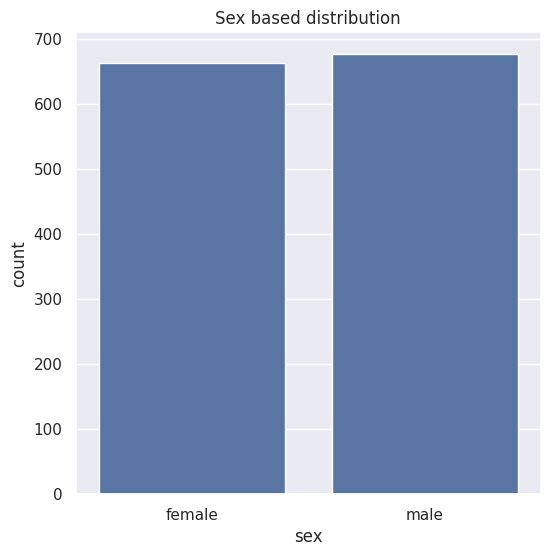

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_df)
plt.title("Sex based distribution")
plt.show()

In [ ]:
insurance_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

**BMI based distribution**


Underweight: BMI less than 18.5

Normal weight: BMI between 18.5 and 24.9

Overweight: BMI between 25 and 29.9

Obesity: BMI 30 or greater

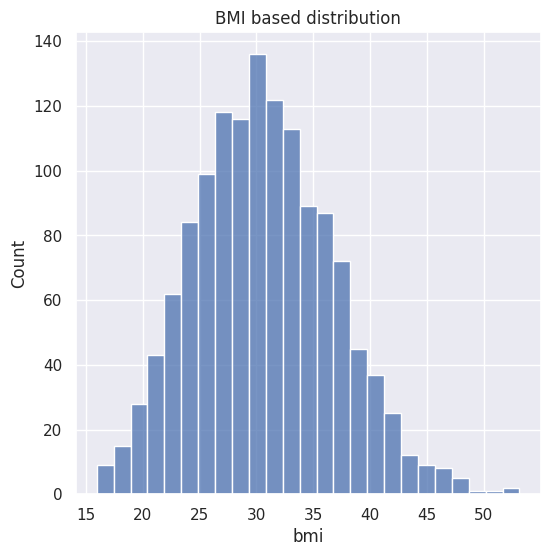

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['bmi'])
plt.title("BMI based distribution")
plt.show()

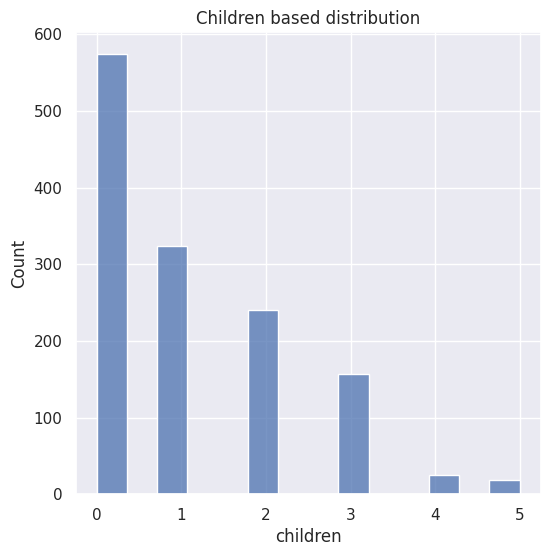

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['children'])
plt.title("Children based distribution")
plt.show()

In [ ]:
insurance_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

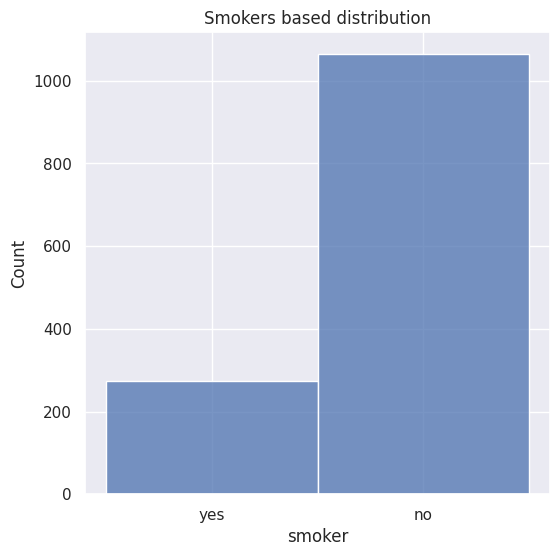

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['smoker'])
plt.title("Smokers based distribution")
plt.show()

In [ ]:
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

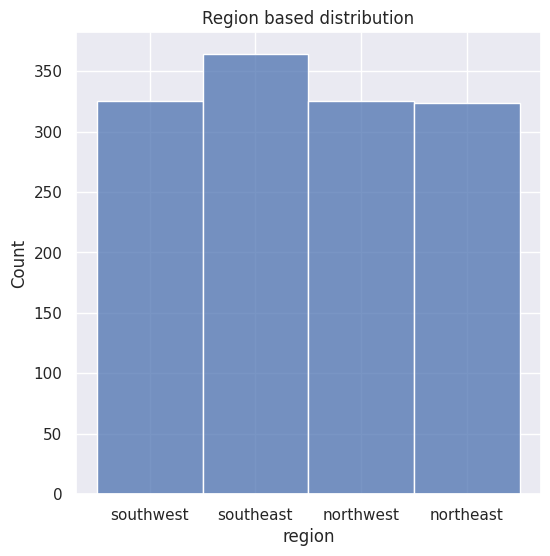

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['region'])
plt.title("Region based distribution")
plt.show()

In [ ]:
insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

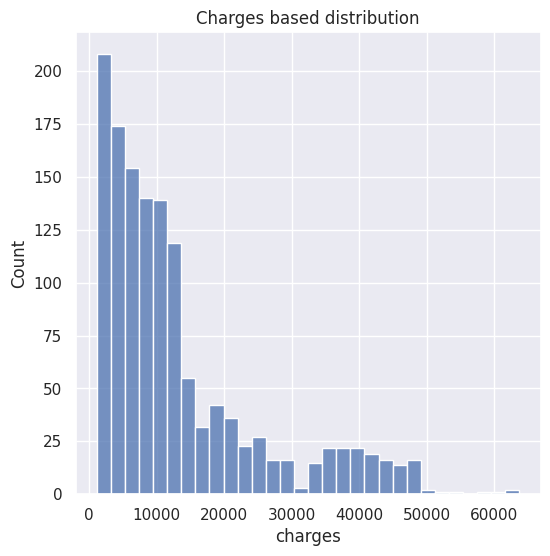

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['charges'])
plt.title("Charges based distribution")
plt.show()

**Data Pre-processing**

Replace Categorical Features:
(sex,smoker and region)

The replace method to replace categorical values with numerical values in the DataFrame df. This can be useful when working with machine learning algorithms that require numerical input.


In [ ]:
insurance_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
unique_values = insurance_df['sex'].unique()
print(unique_values)

['female' 'male']


In [ ]:
unique_values = insurance_df['smoker'].unique()
print(unique_values)

['yes' 'no']


In [ ]:
unique_values = insurance_df['region'].unique()
print(unique_values)

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
insurance_df.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


Then use X and y for further data preprocessing, model training, and evaluation in machine learning tasks.

In [ ]:
X=insurance_df.drop(columns='charges',axis=1)
y=insurance_df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

**Training and Testing**

This line splits the feature matrix X and target vector y into training and testing sets. The training set (X_train, y_train) will contain 80% of the data, and the testing set (X_test, y_test) will contain the remaining 20%. The test_size parameter specifies the proportion of the dataset to include in the testing set (in this case, 20%). The random_state parameter ensures reproducibility by fixing the random seed, so you get the same split each time you run the code.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Amoung the 1338 datasets, the traing data is 1078 and testing data is 268(20% from the dataset)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**LinearRegression model**

Linear Regression is a supervised learning algorithm used for modeling the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data

Definition: Linear Regression is a supervised learning algorithm used for modeling the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

Equation: The basic equation of a linear regression model with one independent variable (simple linear regression) is:


y = mx + b
where:

y is the dependent variable (target)

x is the independent variable (feature)

m is the slope (coefficient) of the line

b is the intercept (bias) term

**Multiple Linear Regression:**
When there are multiple independent variables, the equation becomes:


y = b0 + b1*x1 + b2*x2 + ... + bn*xn
where:

b0 is the intercept
b1, b2, ..., bn are the coefficients for each independent variable

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Then use these predictions to evaluate the performance of the model, typically by comparing them to the actual target values y_test. This will give insights into how well model is performing on unseen data.

**Training Data prediction**

In [ ]:
traing_data_prediction=model.predict(X_train)

In [ ]:
r2_train=metrics.r2_score(y_train,traing_data_prediction)
print("R squared value in traing data:",r2_train)

R squared value in traing data: 0.7519923667088932


**Testing Data prediction**

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
r2_test =metrics.r2_score(y_test,test_data_prediction)
print("R-squared value in test data:", r2_test)


R-squared value in test data: 0.7445422986536503


In [ ]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 4285.219437633699


As the result of Traing and testing prediction the r square value almost same(0.7519923667088932~0.7445422986536503).
Here this results shows that there is no overfitting issues


In [ ]:
input_data=(31,1,25.74,0,1,2)#3866.85520
input_data_as_numpy_array=np.asarray(input_data) #change input to numpy array(tuple >> numpy)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) #reshape the array....no need al data only given input data is enough to predict
prediction=model.predict(input_data_reshaped)
print(prediction)

[4235.07576416]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Streamlit Visualization**

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Select features and target variable
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Define function to make predictions
def predict_charge(age,sex,bmi,children,smoker, region):
    input_data = {'age': [age],
                  'sex': [sex],
                  'bmi': [bmi],
                  'children': [children],
                  'smoker': [smoker],
                  'region': [region]}
    input_df = pd.DataFrame(input_data)
    input_df = pd.get_dummies(input_df,drop_first=True)
    # Add missing columns with zeros
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    input_df = input_df[X.columns]  # Reorder columns to match training data
    prediction = model.predict(input_df)
    return prediction[0]

# Create Streamlit web app
st.title('Medical Insurance Cost Prediction')

# Input form for user to enter car details
st.sidebar.header('Enter Medical Details:')
age = st.sidebar.slider('age', min_value=1)
sex = st.sidebar.selectbox('sex',['male', 'female'])
bmi = st.sidebar.number_input('bmi', min_value=1)
children = st.sidebar.number_input('children', min_value=0)
smoker = st.sidebar.selectbox('smoker',['yes', 'no'])
region = st.sidebar.selectbox('region',['southwest','southeast','northwest','northeast'])


# Predict selling price based on user input
predicted_charge =predict_charge(age,sex,bmi,children,smoker,region)

# Display predicted selling price
st.subheader('Medical Insurance Cost Prediction:')
st.markdown(f"<p style='font-size: 24px;'>{predicted_charge}</p>", unsafe_allow_html=True)

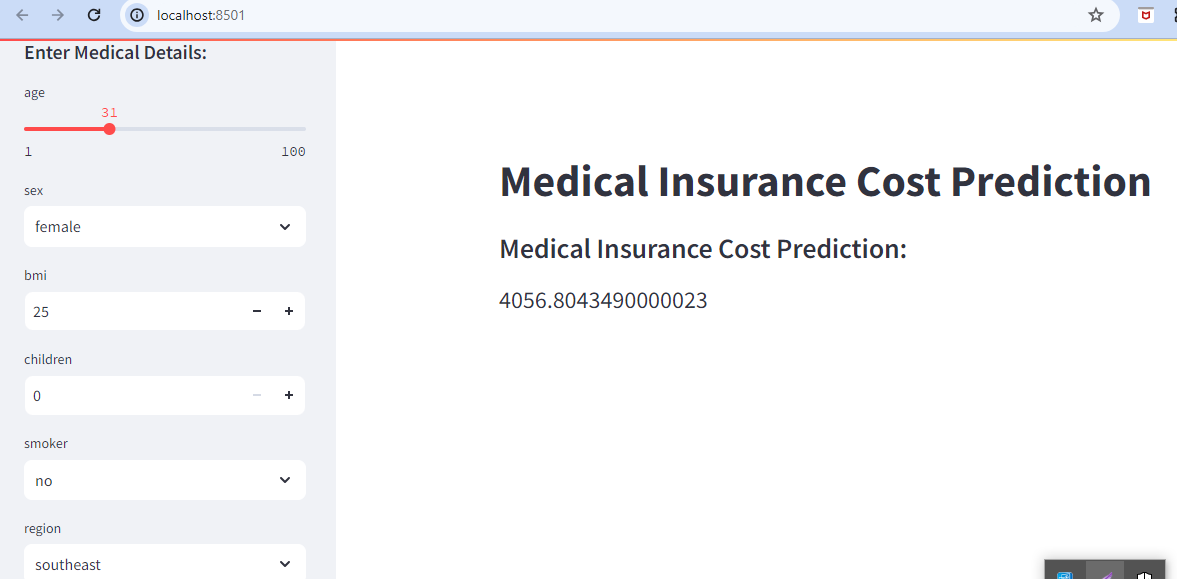

In [45]:
from IPython.display import Image
image_path='Screenshot_2.png'
Image(filename=image_path)